In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Documents/Oz-linescan/20190417_colorcorrected_croped/LineScans/'

Membraneimage = '/Users/aimachine/Documents/Oz-linescan/20190417_colorcorrected_croped/LineScans/Ch1LineScan_C2-20190417_1x16_1TrackID1.tif'

Actinimage = '/Users/aimachine/Documents/Oz-linescan/20190417_colorcorrected_croped/LineScans/Ch2LineScan_C2-20190417_1x16_1TrackID1.tif'



#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8

#Symmetric psf as input (micrometers)
psf = 0.17
showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data'    
MakePath(save_dir)


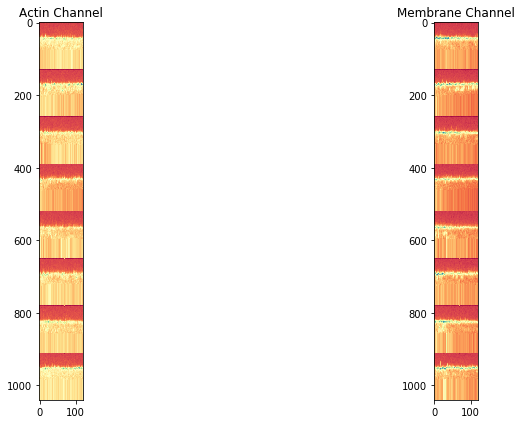

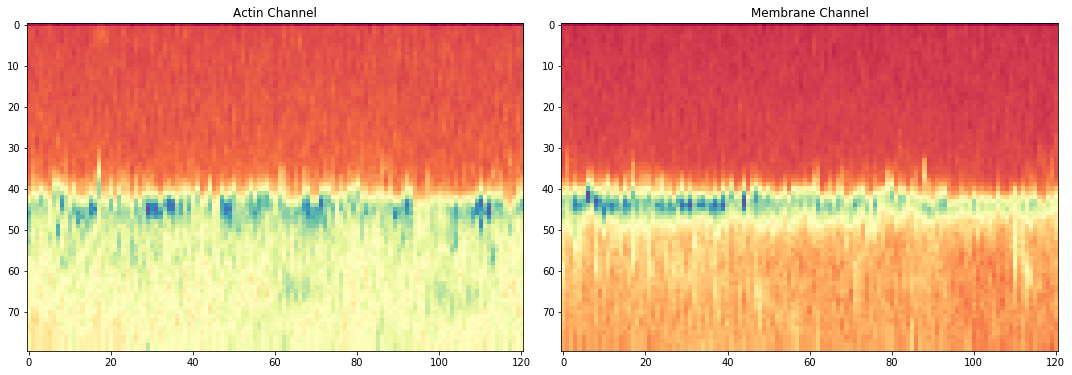

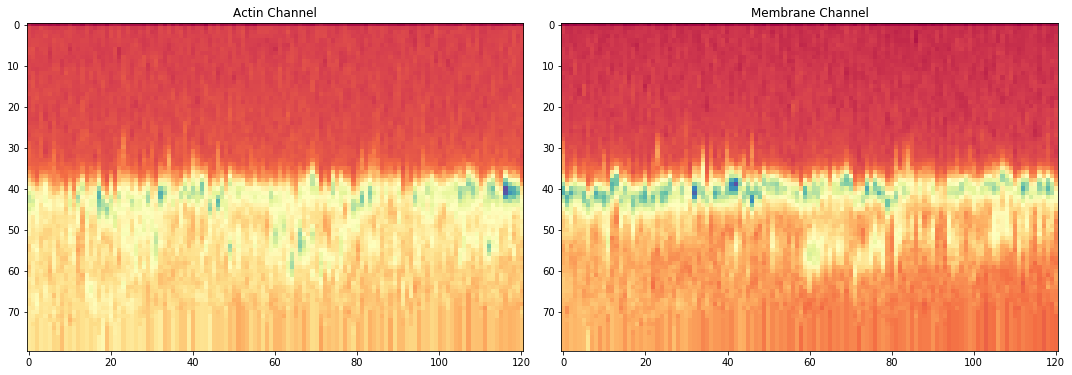

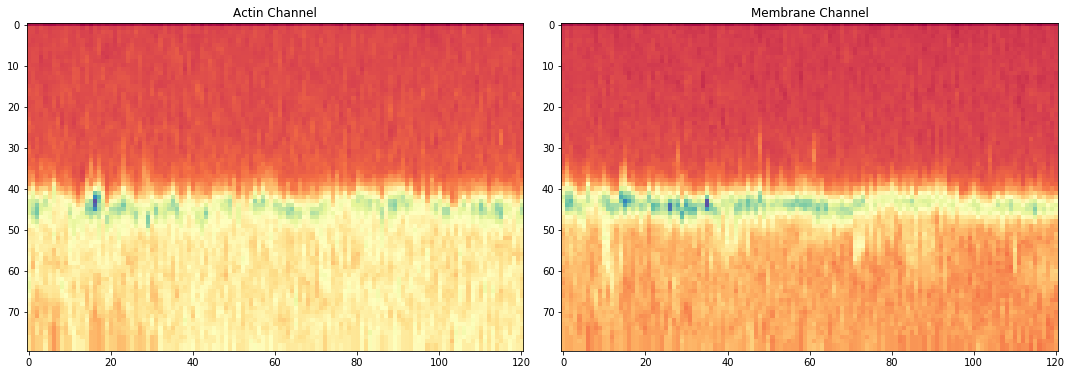

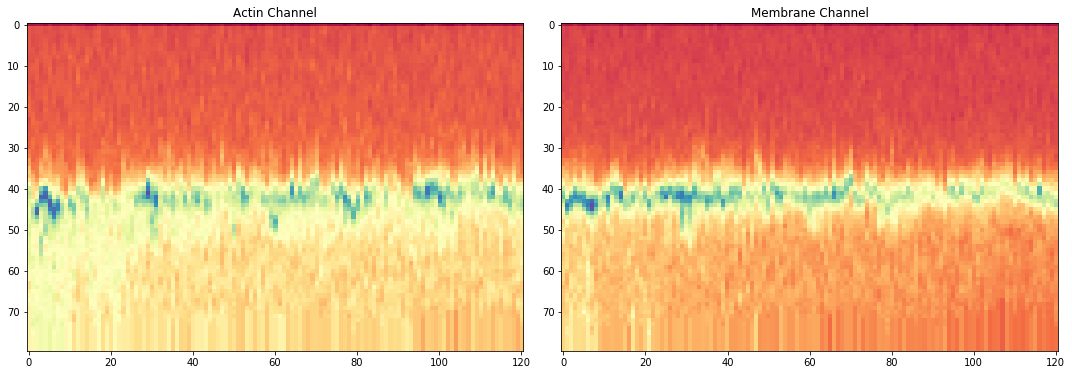

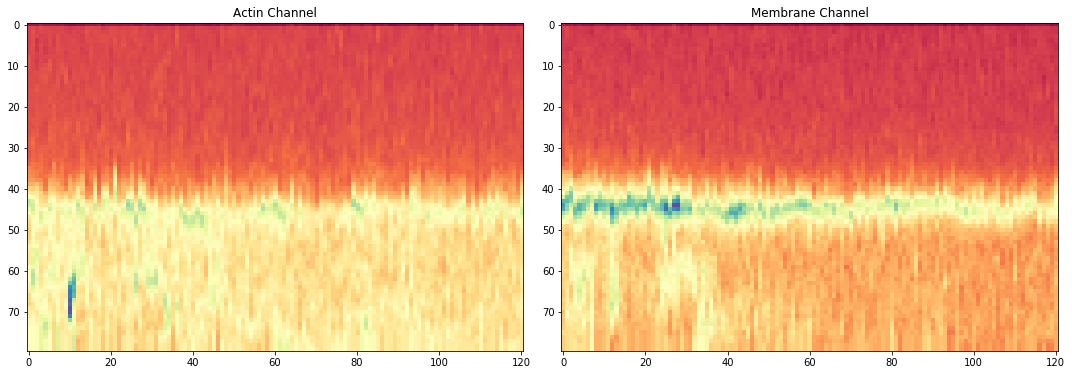

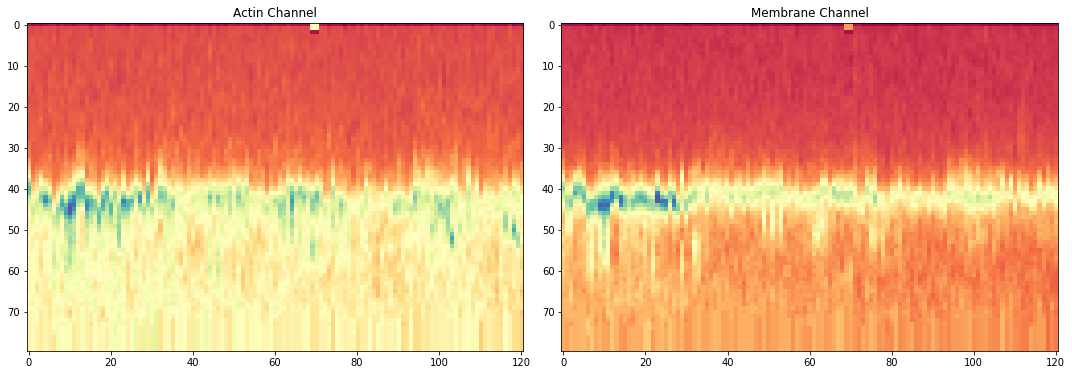

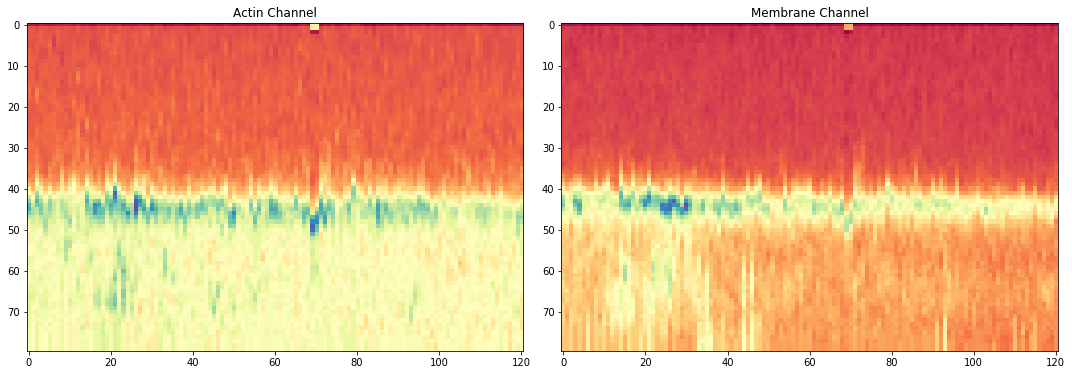

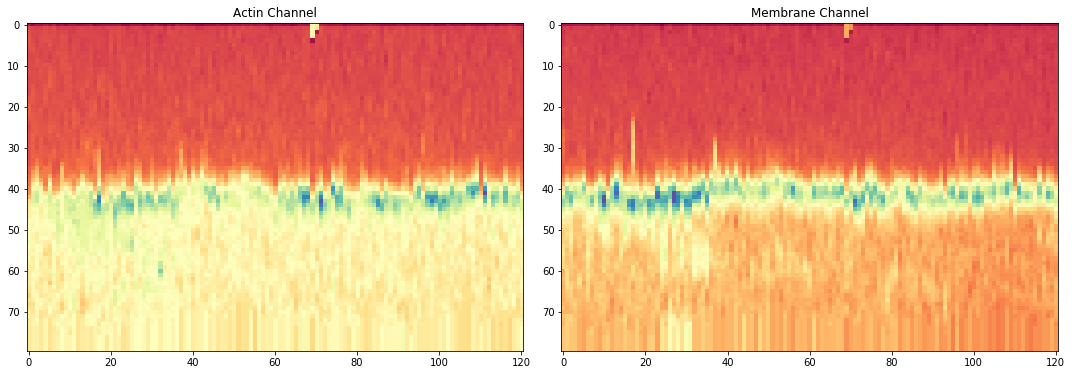

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/aimachine/PyImage/utils/GaussFit.py:392: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:408: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:468: RuntimeWarning: invalid value encountered in log
  (self.actin.i_in - i_c_start  ))))


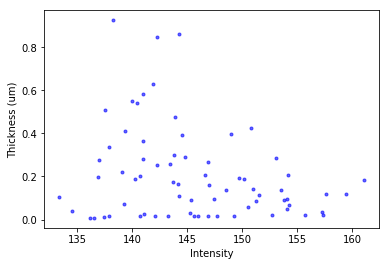

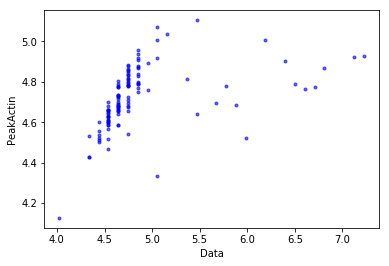

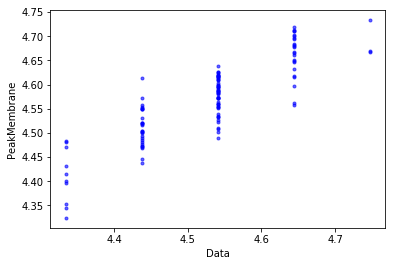

Thickness (min) 7.586616667751097 nm
Thickness (median) 141.46719697003178 nm
Thickness (max) 925.8650543759928 nm
Ransac Slope =  -5.928e-05
Regression Slope =  -5.928e-05
Mean Thickness (After outlier removal) =  0.209 um


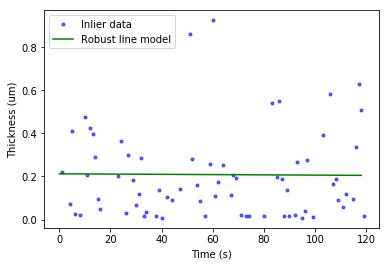

Loading BokehJS ...

block id 2
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 26.32626261   0.21003271   4.20080903 136.62557537]
Actin Fit: [88.10421794  0.52857032  4.44685008 82.80692534]


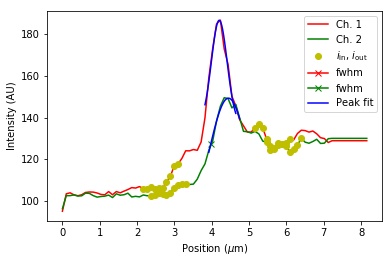

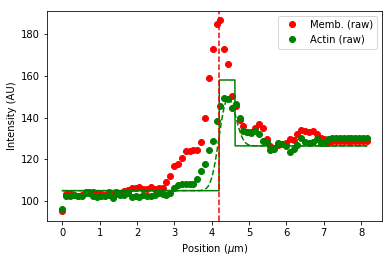

Thickness (nm), center cortex , cortical actin intensity (from fit) 420.796524122402 4.411207287973347 158.01770100749815


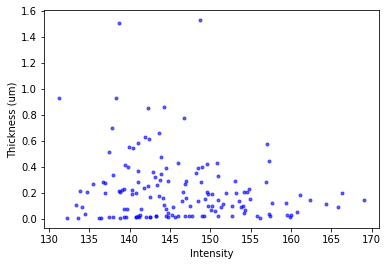

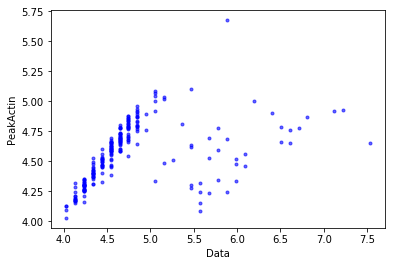

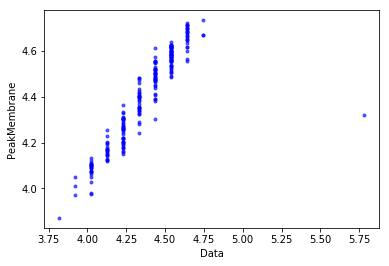

Thickness (min) 6.122097919187507 nm
Thickness (median) 154.34242282006278 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -3.336e-04
Regression Slope =  -1.569e-04
Mean Thickness (After outlier removal) =  0.205 um


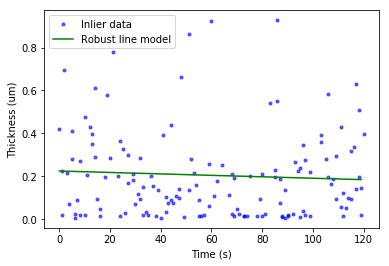

Loading BokehJS ...

block id 3
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [182.17735492   0.59645452   4.43342833  34.11797344]
Actin Fit: [  8.8475233    0.23013498   4.61953167 125.03503489]


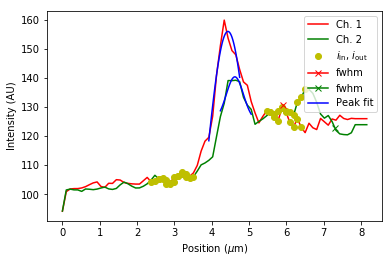

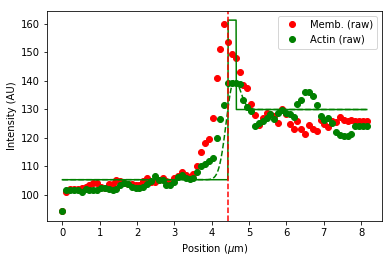

Thickness (nm), center cortex , cortical actin intensity (from fit) 219.90350295733774 4.543380078250327 161.2328473406271


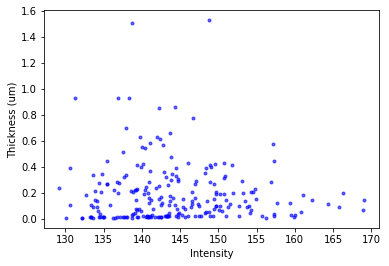

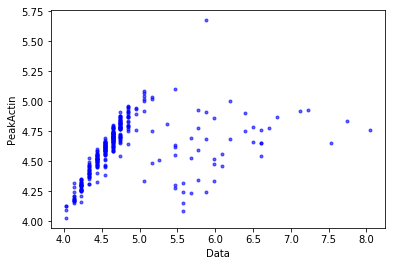

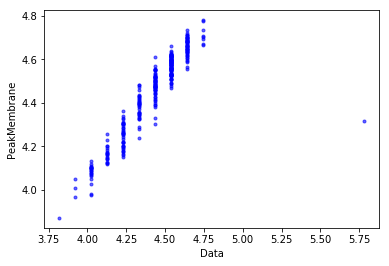

Thickness (min) 6.122097919187507 nm
Thickness (median) 118.55307735500395 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -9.687e-04
Regression Slope =  -8.601e-04
Mean Thickness (After outlier removal) =  0.182 um


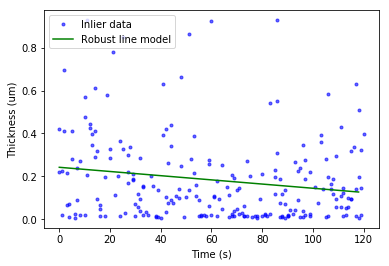

Loading BokehJS ...

block id 4
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 12.80197305   0.16418318   4.31730175 129.67402603]
Actin Fit: [ 13.72939159   0.19838654   4.348551   123.29461909]


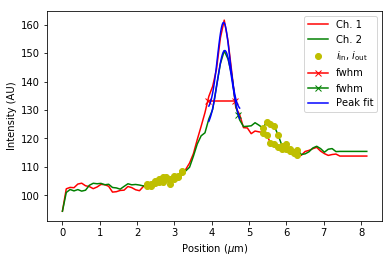

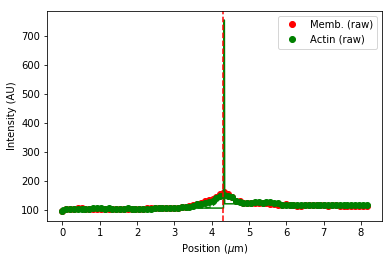

Thickness (nm), center cortex , cortical actin intensity (from fit) 25.093215431662195 4.329848353368026 754.0163981141544


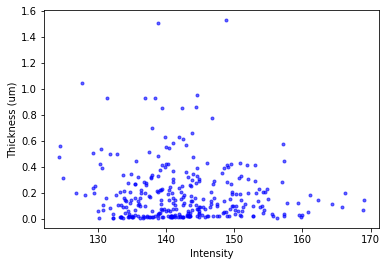

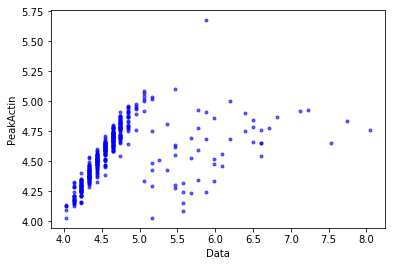

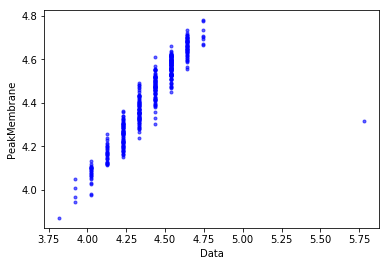

Thickness (min) 6.122097919187507 nm
Thickness (median) 118.55307735500395 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -9.430e-04
Regression Slope =  -8.898e-04
Mean Thickness (After outlier removal) =  0.182 um


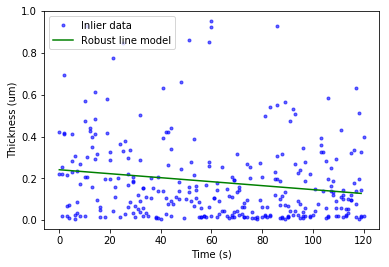

Loading BokehJS ...

block id 5
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 16.0511127    0.2239813    4.65247587 123.95682572]
Actin Fit: [  6.2753295    0.19188506   4.74394664 121.14492507]


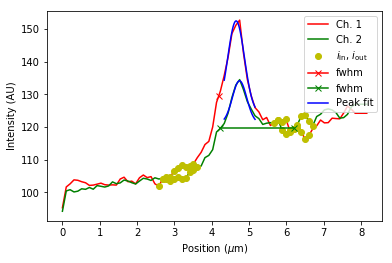

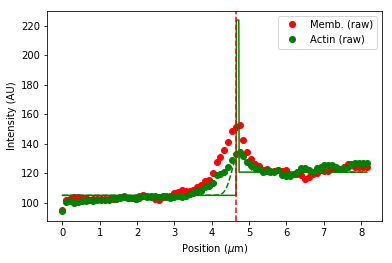

Thickness (nm), center cortex , cortical actin intensity (from fit) 79.17893349965507 4.692065340690395 223.7150287058425


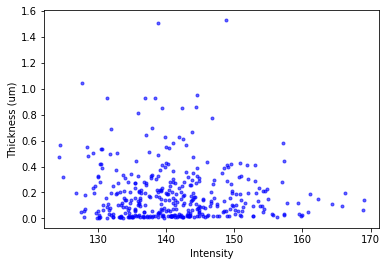

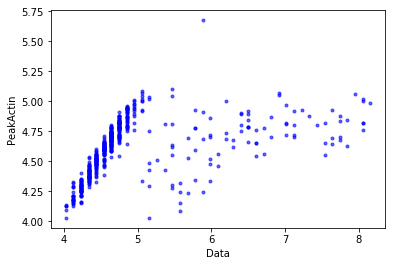

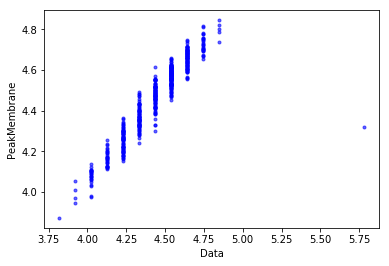

Thickness (min) 3.831341521254953 nm
Thickness (median) 120.7792410852869 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -9.900e-04
Regression Slope =  -8.837e-04
Mean Thickness (After outlier removal) =  0.174 um


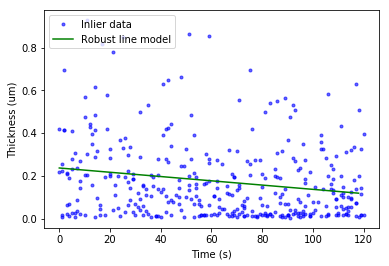

Loading BokehJS ...

block id 6


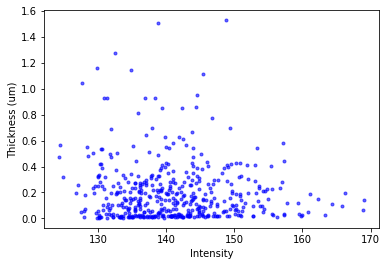

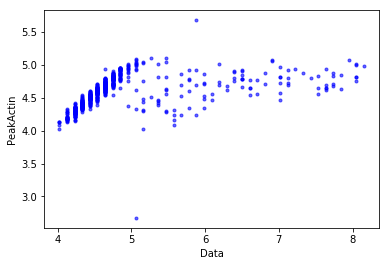

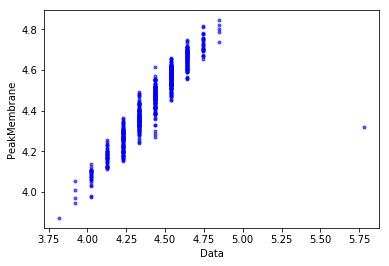

Thickness (min) 3.831341521254953 nm
Thickness (median) 140.2386761951976 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -6.695e-04
Regression Slope =  -5.260e-04
Mean Thickness (After outlier removal) =  0.181 um


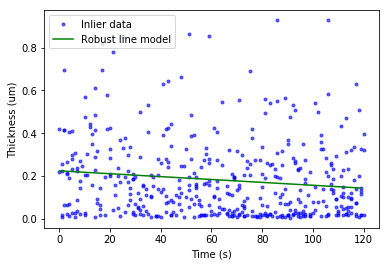

Loading BokehJS ...

block id 7
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 17.16239412   0.18967295   4.50420191 139.65770471]
Actin Fit: [ 15.45088382   0.23663226   4.61724397 121.10519992]


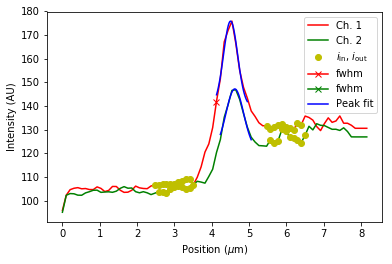

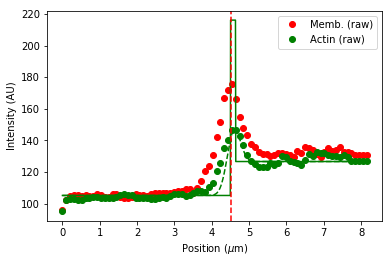

Thickness (nm), center cortex , cortical actin intensity (from fit) 131.54457638973767 4.56997419930031 216.10646643492828
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 28.9891407    0.31010667   4.57487736 108.51250463]
Actin Fit: [ 2.94916541e+05  9.98521635e+00  4.85159545e+00 -1.16512251e+04]


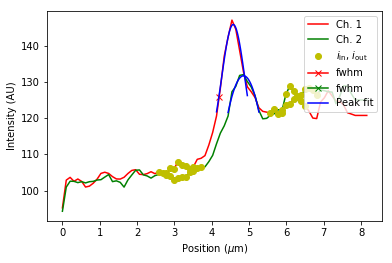

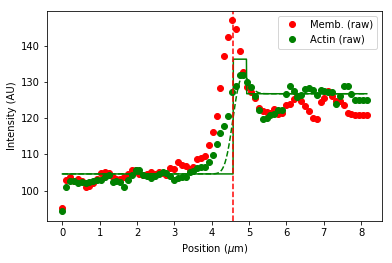

Thickness (nm), center cortex , cortical actin intensity (from fit) 361.69714311260066 4.755725934827917 136.24527071096747


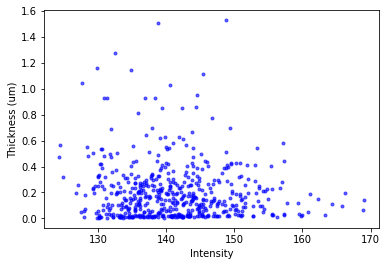

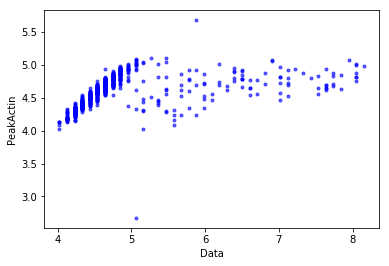

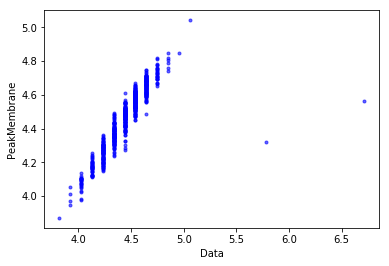

Thickness (min) 3.831341521254953 nm
Thickness (median) 145.76981777011287 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -5.746e-04
Regression Slope =  -4.805e-04
Mean Thickness (After outlier removal) =  0.186 um


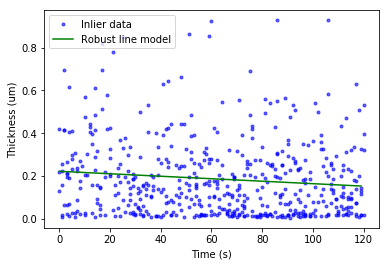

Loading BokehJS ...

block id 8
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 24.5032287    0.21222515   4.34918084 135.1255551 ]
Actin Fit: [ 17.42143815   0.23432125   4.54004191 128.37494383]


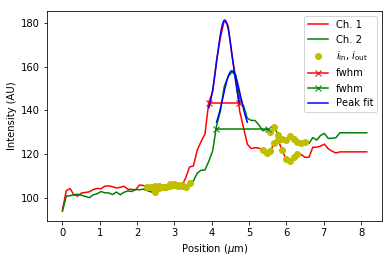

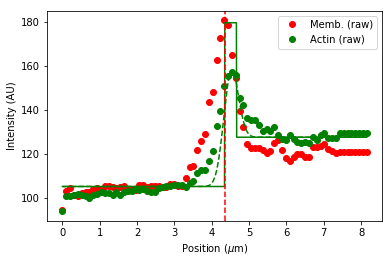

Thickness (nm), center cortex , cortical actin intensity (from fit) 316.2941131870663 4.507327897601691 179.80288513329955


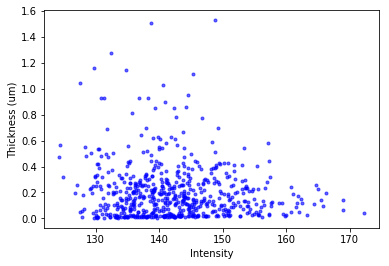

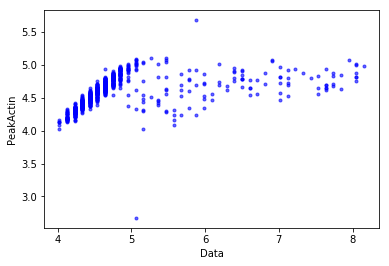

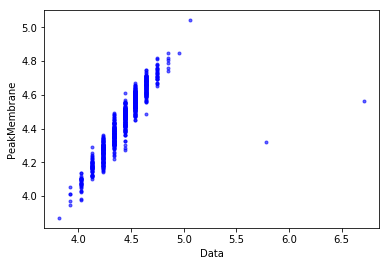

Thickness (min) 3.831341521254953 nm
Thickness (median) 146.32165971507249 nm
Thickness (max) 1527.9949958950804 nm
Ransac Slope =  -6.306e-04
Regression Slope =  -5.383e-04
Mean Thickness (After outlier removal) =  0.189 um


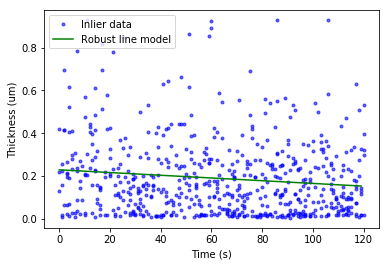

Loading BokehJS ...

CPU times: user 7min 13s, sys: 3.92 s, total: 7min 17s
Wall time: 7min 13s


In [4]:
%%time
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
for i in range(0, totallength):
 print('block id', i+1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, DataActin, PeakMembrane, DataMembrane, Time)
 
 Correlation_plot(Thickness, Intensity)
 Peak_Data(PeakActin, DataActin, 'Actin')
 Peak_Data(PeakMembrane, DataMembrane, 'Membrane')   
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 Thickness_time = np.column_stack([Time, Thickness]) 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)

 #clear_output(wait = True)
    


Ransac Slope =  -6.014e-04
Regression Slope =  -4.933e-04
Mean Thickness (After outlier removal) =  0.185 um


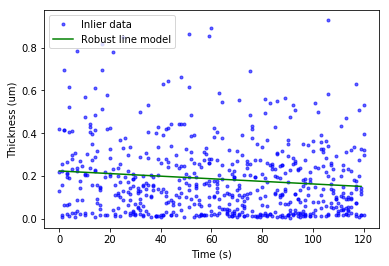

Loading BokehJS ...

In [5]:
show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    


In [6]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_time:
    master_data.append(line)
writer = csv.writer(open(save_dir + "/" + (os.path.basename(Actinimage))  +".csv", "w"))
writer.writerows(master_data)  

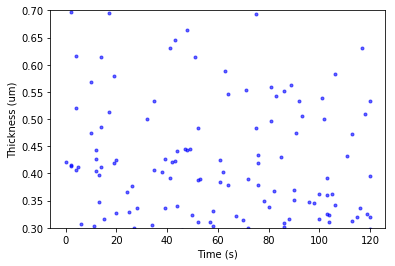

X: 141.51350563764572 Y:  0.21313509897120606
X: 159.66731262207034 Y:  0.13732222535626754
X: 133.3441381354081 Y:  0.21028030717655422
X: 149.61351670313928 Y:  0.19738758265689987


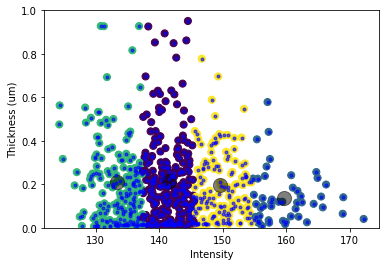

In [9]:
show_plot(Thickness_time,  ymin = 0.3, ymax = 0.7)
num_clusters = 4
show_intensity_plot(Thickness_intensity, ymin = 0, ymax = 1, num_clusters = num_clusters )

X: 0.21168264004924942 Y:  137.35896740993252
X: 0.1873609721532353 Y:  150.95510189090152


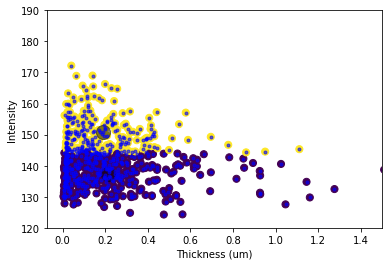

In [8]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots() 
ax.plot(Thickness_intensity[:, 0], Thickness_intensity[: , 1], '.b', alpha=0.6,
        label='Inlier data')
x_min, x_max = ax.get_xlim()
ax.axis([x_min,1.5, 120, 190])
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Intensity')
X = np.column_stack([Thickness_intensity[:, 0], Thickness_intensity[: , 1]])  
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
for i in range(0, len(centers)):
     print('X:', centers[i, 0], 'Y: ', centers[i, 1])
plt.show()